### PDE Intial Condition to Approximate
$$u=u(x,t)$$
$$ u(x,0) = 7,  \hspace{10 mm}     [0, \frac{\pi}{3}] $$

In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np
from time import time
pi = math.pi

In [30]:
def a_n(n): 
    return 0

def b_n(n):
    b = (-14 / (pi *n)) * ((-1)**(n) - 1)
    return b 

def fourier(a_coeff, b_coeff, x_input, interval_length, a_0=0, ):
    
    total = 0
    y_output = np.zeros(x_input.shape[0])
    coefficient_size = len(a_coeff)

    for counter, x in enumerate(x_input):
        # print('counter is:', counter, '\nx is: ', x, )

        for i in range(coefficient_size):
            total += a_coeff[i] * math.cos( ((i + 1) * x  * pi) / interval_length) + b_coeff[i] * math.sin( ((i + 1) * x * pi) / interval_length)
            
        y_output[counter] = (a_0/2) + total
        total = 0  # rest total
    return y_output

vector_a = np.vectorize(a_n)
vector_b = np.vectorize(b_n)

In [31]:
interval_length = pi / 3
a_0 = a_n(0)

x_start = 0
x_end = pi / 3
x_domain = np.linspace(x_start, x_end, 1001)  # iterated x_domain from 0 to 2 

number_of_coeff = 900

n = np.arange(1,number_of_coeff + 1, 1, dtype=np.int32)
a = vector_a(n)  #  terms are generated
b = vector_b(n)
y_estimates = fourier(a, b, x_domain,interval_length ,a_0)



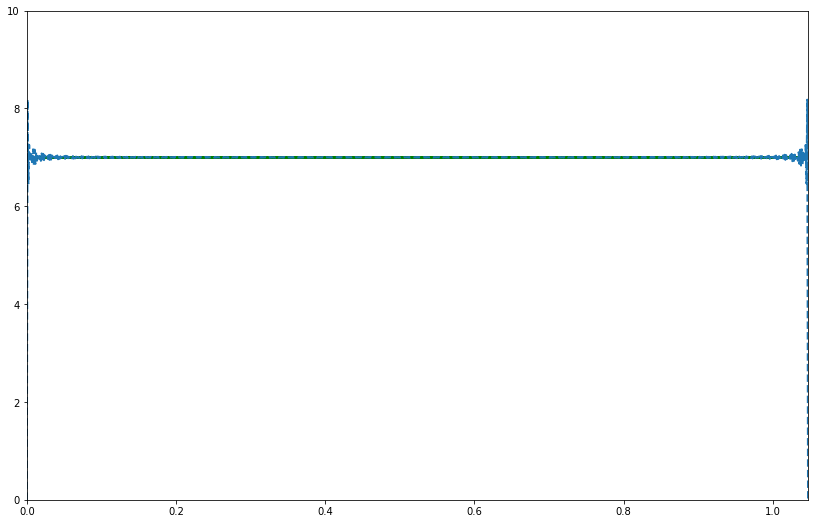

In [35]:
fig, ax = plt.subplots(ncols=1, figsize=(14, 9))
ax.set_ylim((0, 10))
ax.set_xlim((x_start, x_end))
ax.plot(x_domain, 7 * np.ones(x_domain.shape[0]), linewidth=3, color='g',label=r'$ u(x,0) = 7, \ \ \  [0, \frac{\pi}{3}]$')
ax.plot(x_domain, y_estimates, linewidth=2, linestyle='dashed', label=f'Fourier Series Approximation:\n $f_1(x)$ with {number_of_coeff} terms'  )
